In [1]:
import pandas as pd
import os
import datetime as dt
date_fmt ='%Y%m%d'
import time

def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [2]:
path ='shortdata'
exch ='CNMS'
findme = os.path.join(path,exch)
derp = getListOfFiles(findme)

In [3]:
# create empty list
dataframes_list = []

    
for file in derp:
    working = open(file,'r')
    temp_df = pd.read_csv(file, delimiter='|',)
    temp_df = temp_df.dropna()
    dataframes_list.append(temp_df)
df = pd.concat(dataframes_list)
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d')

In [4]:
Symbols = df.Symbol.unique()
Symbols

array(['A', 'AA', 'AAA', ..., 'SFTW/U', 'ADERU', 'ITQRU'], dtype=object)

In [5]:
%%time

starttime = time.time()
list_time = []
list_df = []
counter = 0 
for symbol in Symbols[:1000]: 
    counter += 1 
    if counter%100 == 0:
        print(symbol,df.shape)
        list_time.append(time.time()-starttime)
    test = df.loc[df['Symbol']==symbol]
    test = test.sort_values(by='Date')
    #df = df.drop(df[df['Symbol'] == symbol].index)
    
    #list_df.append(test)

ACRpD (365096, 6)
AFG (365096, 6)
AIQ (365096, 6)
ALpA (365096, 6)
AP (365096, 6)
ARMR (365096, 6)
ATLO (365096, 6)
AWAY (365096, 6)
BBCP (365096, 6)
BEPC (365096, 6)
CPU times: user 18.4 s, sys: 175 µs, total: 18.4 s
Wall time: 18.4 s


No drop, 
100 iterations
CPU times: user 1.82 s, sys: 2 µs, total: 1.82 s
Wall time: 1.82 s

1000 iterations
CPU times: user 20.1 s, sys: 4 ms, total: 20.2 s
Wall time: 20.2 s


drop
CPU times: user 1min 15s, sys: 3.72 s, total: 1min 18s
Wall time: 1min 18s

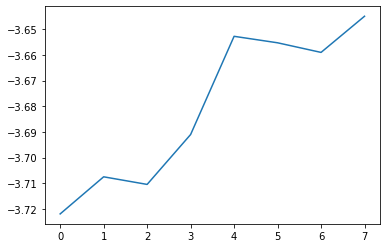

In [6]:
from matplotlib import pyplot as plt
import numpy as np
np_time = np.array(list_time)
plt.plot(np_time[:-2]-np_time[2:])

In [7]:
test = test.sort_values(by='Date')

In [12]:
test

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
1020,2021-12-01,BEPC,96391.0,134.0,302864.0,"B,Q,N"
1012,2021-12-02,BEPC,85144.0,538.0,322710.0,"B,Q,N"
1008,2021-12-03,BEPC,110721.0,52.0,349801.0,"B,Q,N"
1008,2021-12-06,BEPC,79140.0,5.0,350111.0,"B,Q,N"
1010,2021-12-07,BEPC,43819.0,954.0,406709.0,"B,Q,N"
1011,2021-12-08,BEPC,71528.0,1031.0,273349.0,"B,Q,N"
1013,2021-12-09,BEPC,107941.0,600.0,419107.0,"B,Q,N"
1006,2021-12-10,BEPC,110509.0,250.0,402646.0,"B,Q,N"
1024,2021-12-13,BEPC,89404.0,1112.0,278236.0,"B,Q,N"
1010,2021-12-14,BEPC,99755.0,0.0,322199.0,"B,Q,N"


In [10]:
10%10

0

In [14]:
gk = df.groupby('Symbol')

In [16]:
gk.first()

,Date,ShortVolume,ShortExemptVolume,TotalVolume,Market
Symbol,,,,,
A,2022-01-11,312846.0,481.0,729203.0,"B,Q,N"
AA,2022-01-11,684218.0,1279.0,2064270.0,"B,Q,N"
AAA,2022-01-11,100.0,0.0,102.0,Q
AAAU,2022-01-11,33159.0,0.0,96148.0,"B,Q,N"
AAC,2022-01-11,124.0,0.0,2656.0,"Q,N"
...,...,...,...,...,...
ZWS,2022-01-11,40201.0,0.0,553739.0,"B,Q,N"
ZY,2022-01-11,70996.0,0.0,310519.0,"B,Q,N"
ZYME,2022-01-11,53555.0,0.0,99647.0,"B,Q,N"


In [33]:
starttime = time.time()
list_time = []
list_df = []
counter = 0 
for symbol in Symbols: 
    counter += 1 
    if counter%100 == 0:
        print(symbol,df.shape)
    sgk = gk.get_group(symbol)
    sgk = sgk.sort_values(by='Date')

    list_time.append(time.time()-starttime)
    #df = df.drop(df[df['Symbol'] == symbol].index)
    


sgk.head()

ACRpD (365096, 6)
AFG (365096, 6)
AIQ (365096, 6)
ALpA (365096, 6)
AP (365096, 6)
ARMR (365096, 6)
ATLO (365096, 6)
AWAY (365096, 6)
BBCP (365096, 6)
BEPC (365096, 6)
BITE/WS (365096, 6)
BMLpG (365096, 6)
BRMK (365096, 6)
BTTX (365096, 6)
CANO/WS (365096, 6)
CDRO (365096, 6)
CHH (365096, 6)
CLDT (365096, 6)
CNFR (365096, 6)
CPARW (365096, 6)
CSL (365096, 6)
CVU (365096, 6)
DBO (365096, 6)
DGLY (365096, 6)
DNAB (365096, 6)
DTOCU (365096, 6)
EBS (365096, 6)
EIC (365096, 6)
ENSC (365096, 6)
ESGC (365096, 6)
EVTL/WS (365096, 6)
FAX (365096, 6)
FEX (365096, 6)
FLDZ (365096, 6)
FNDX (365096, 6)
FRSH (365096, 6)
FUV (365096, 6)
GBX (365096, 6)
GIIX (365096, 6)
GNR (365096, 6)
GSBC (365096, 6)
HAS (365096, 6)
HI (365096, 6)
HPX (365096, 6)
HYG (365096, 6)
ICF (365096, 6)
IGT (365096, 6)
INDF (365096, 6)
IQDY (365096, 6)
IVRpC (365096, 6)
JHMF (365096, 6)
JUST (365096, 6)
KLCD (365096, 6)
KWR (365096, 6)
LFTR (365096, 6)
LOOP (365096, 6)
LZ (365096, 6)
MDRX (365096, 6)
MIGI (365096, 6)
MNSB (36

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
4955,2021-12-08,ITQRU,1000.0,1000.0,4950.0,Q


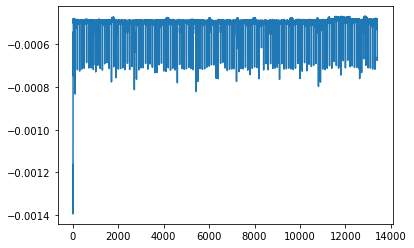

In [34]:
from matplotlib import pyplot as plt
import numpy as np
np_time = np.array(list_time)
plt.plot(np_time[:-2]-np_time[2:])

In [35]:
sgk

,Date,Symbol,ShortVolume,ShortExemptVolume,TotalVolume,Market
4955,2021-12-08,ITQRU,1000.0,1000.0,4950.0,Q


In [37]:
Symbols[-4:]

array(['SCOM', 'SFTW/U', 'ADERU', 'ITQRU'], dtype=object)